In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1 CARREGAMENTO DO ARQUIVO ---
file_path = '/content/sample_data/dataset.csv'
df = pd.read_csv(file_path)

# --- 2 CRIAR CÓPIA PARA LIMPEZA ---
df_clean = df.copy()

# --- 3 CONVERSÃO DE REVENUE E BUDGET PARA NUMÉRICO ---
df_clean['revenue'] = pd.to_numeric(df_clean['revenue'].astype(str).str.replace(',', '').str.strip(), errors='coerce')
df_clean['budget'] = pd.to_numeric(df_clean['budget'].astype(str).str.replace(',', '').str.strip(), errors='coerce')

# --- 4 SUBSTITUIR ZEROS POR NaN ---
df_clean['revenue'] = df_clean['revenue'].replace(0, pd.NA)
df_clean['budget'] = df_clean['budget'].replace(0, pd.NA)

# --- 5 REMOVER LINHAS COM VALORES FALTANTES ---
cols_to_check = ['revenue', 'release_date', 'budget', 'cast', 'directors', 'production_companies', 'genres', 'title']
df_clean = df_clean.dropna(subset=cols_to_check)

# --- 6 REMOÇÃO DE OUTLIERS (1% superior e inferior) ---
rev_low, rev_high = df_clean['revenue'].quantile([0.01, 0.99])
df_clean = df_clean[(df_clean['revenue'] >= rev_low) & (df_clean['revenue'] <= rev_high)]

bud_low, bud_high = df_clean['budget'].quantile([0.01, 0.99])
df_clean = df_clean[(df_clean['budget'] >= bud_low) & (df_clean['budget'] <= bud_high)]

# --- 7 NORMALIZAÇÃO DAS CATEGÓRICAS ---
for col in ['cast', 'directors', 'production_companies', 'genres']:
    df_clean[col] = df_clean[col].astype(str).str.strip().str.lower()

# --- 8 PARSE DA DATA E EXTRAÇÃO DAS FEATURES ---
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'], errors='coerce')
df_clean = df_clean.dropna(subset=['release_date'])

df_clean['release_year'] = df_clean['release_date'].dt.year
df_clean['release_month'] = df_clean['release_date'].dt.month


# Pre Processamento de Dados:

**Carregamento e cópia:** importa o CSV e cria uma cópia para limpeza.

**Conversão numérica:** transforma revenue e budget em valores numéricos.

**Tratamento de zeros e faltantes:** substitui zeros por NaN e remove linhas incompletas.

**Remoção de outliers:** elimina valores extremos de revenue e budget.

**Normalização de categorias:** padroniza textos de cast, directors, production_companies e genres.

**Extração de datas:** converte release_date para datetime e gera release_year e release_month.


--- Info do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
Index: 9271 entries, 1 to 432642
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9271 non-null   int64         
 1   title                 9271 non-null   object        
 2   vote_average          9271 non-null   float64       
 3   vote_count            9271 non-null   int64         
 4   status                9271 non-null   object        
 5   release_date          9271 non-null   datetime64[ns]
 6   revenue               9271 non-null   object        
 7   runtime               9271 non-null   int64         
 8   adult                 9271 non-null   bool          
 9   backdrop_path         8867 non-null   object        
 10  budget                9271 non-null   object        
 11  homepage              3031 non-null   object        
 12  tconst                9271 non-null   object        

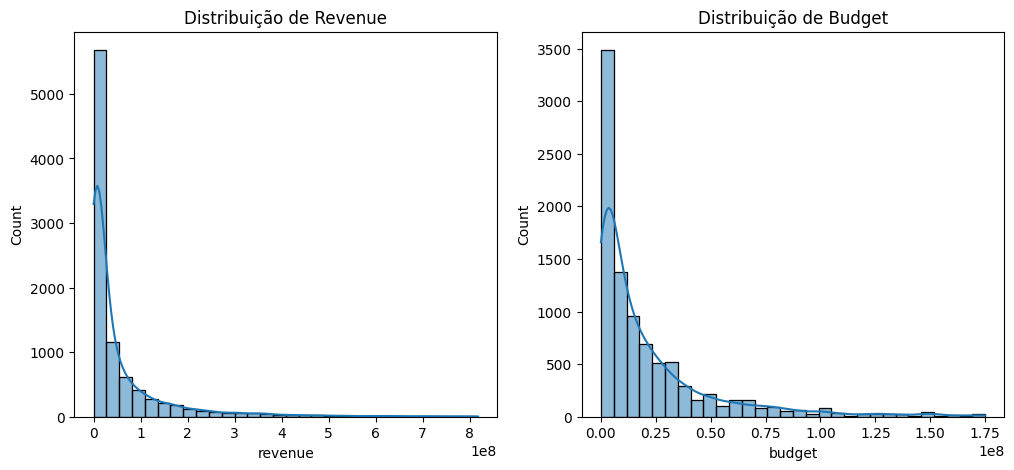

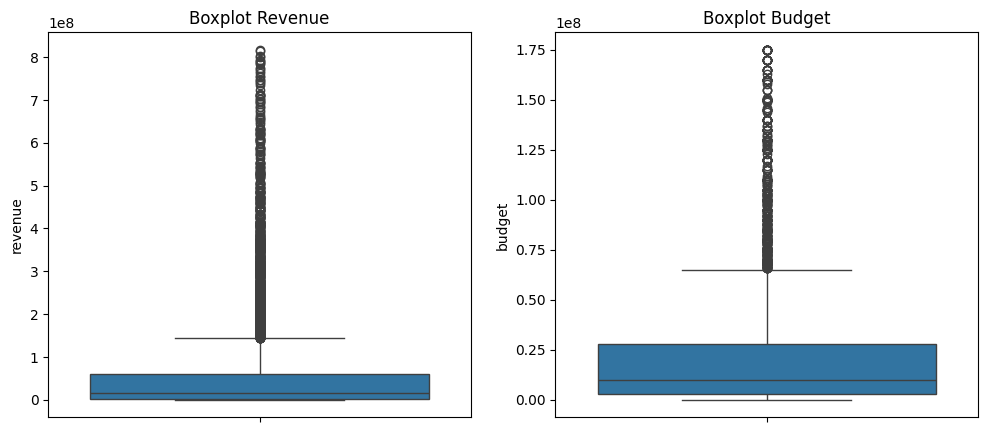


--- Correlação entre Revenue, Budget e Datas ---
                revenue    budget  release_year  release_month
revenue        1.000000  0.696345      0.131554       0.034516
budget         0.696345  1.000000      0.222095       0.041983
release_year   0.131554  0.222095      1.000000      -0.035650
release_month  0.034516  0.041983     -0.035650       1.000000

--- cast ---
Total de valores únicos individuais: 39439
Top 10 valores mais frequentes:
cast
samuel l. jackson    73
robert de niro       69
nicolas cage         69
bruce willis         67
morgan freeman       60
liam neeson          54
tom hanks            51
meryl streep         49
alec baldwin         48
matt damon           48
Name: count, dtype: int64

--- directors ---
Total de valores únicos individuais: 4911
Top 10 valores mais frequentes:
directors
clint eastwood          37
steven spielberg        32
woody allen             30
alfred hitchcock        27
ridley scott            25
steven soderbergh       24
martin sco

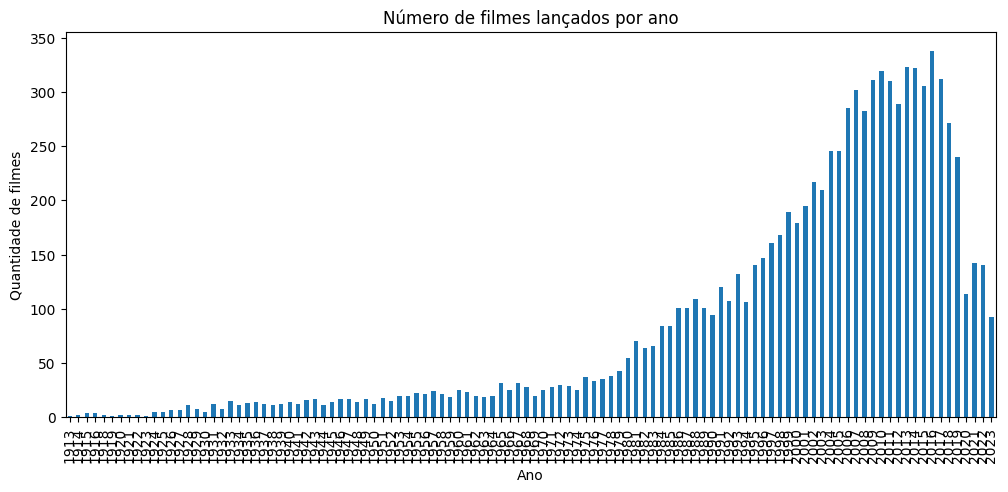

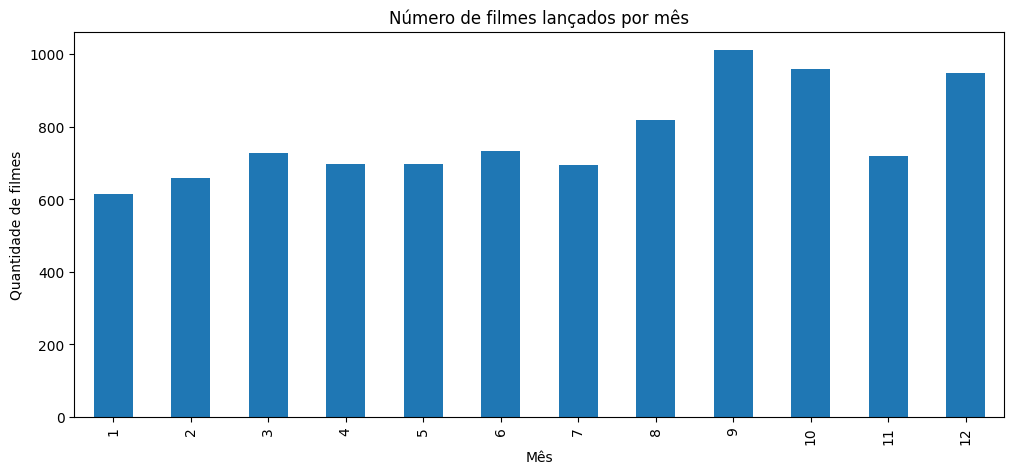

In [ ]:
# --- INFO E ESTATÍSTICAS ---
print('\n--- Info do DataFrame ---')
print(df_clean.info())

print('\n--- Estatísticas de revenue, budget, release_year e release_month ---')
print(df_clean[['revenue', 'budget', 'release_year', 'release_month']].describe())

# Valor mais frequente e maior valor com título
for col in ['revenue', 'budget']:
    mode_val = df_clean[col].mode()[0]
    mode_freq = df_clean[col].value_counts().iloc[0]
    max_val = df_clean[col].max()
    title_max = df_clean.loc[df_clean[col] == max_val, 'title'].values
    print(f"\n{col.upper()} - valor mais frequente: {mode_val}, frequência: {mode_freq}")
    print(f"{col.upper()} - maior valor: {max_val}, filme(s): {title_max}")

# --- DISTRIBUIÇÕES ---
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_clean['revenue'], bins=30, kde=True)
plt.title('Distribuição de Revenue')

plt.subplot(1,2,2)
sns.histplot(df_clean['budget'], bins=30, kde=True)
plt.title('Distribuição de Budget')
plt.show()

# Boxplots
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=df_clean['revenue'])
plt.title('Boxplot Revenue')

plt.subplot(1,2,2)
sns.boxplot(y=df_clean['budget'])
plt.title('Boxplot Budget')
plt.show()

# --- CORRELAÇÃO ---
corr = df_clean[['revenue', 'budget', 'release_year', 'release_month']].corr()
print('\n--- Correlação entre Revenue, Budget e Datas ---')
print(corr)

# --- ANÁLISE DE COLUNAS CATEGÓRICAS ---
categorical_cols = ['cast', 'directors', 'production_companies', 'genres']
for col in categorical_cols:
    exploded = df_clean[col].str.split(',').explode().str.strip()
    unique_count = exploded.nunique()
    print(f'\n--- {col} ---')
    print(f'Total de valores únicos individuais: {unique_count}')
    print(f'Top 10 valores mais frequentes:\n{exploded.value_counts().head(10)}')

# --- DISTRIBUIÇÃO ANUAL ---
print('\n--- Distribuição por ano ---')
print(df_clean['release_year'].value_counts().sort_index())

plt.figure(figsize=(12,5))
df_clean['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Número de filmes lançados por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de filmes')
plt.show()

# --- DISTRIBUIÇÃO POR MÊS ---
plt.figure(figsize=(12,5))
df_clean['release_month'].value_counts().sort_index().plot(kind='bar')
plt.title('Número de filmes lançados por mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de filmes')
plt.show()


# **1 Análise Exploratória do Dataset**

Esta célula realiza a análise estatística e exploratória do dataset de filmes, organizada em etapas:

  # **1.1 Informações gerais**

Verifica o tipo de dados, quantidade de valores não nulos e colunas disponíveis no dataset.

Conclusão: temos 9271 filmes após limpeza, com 31 colunas, incluindo revenue, budget, release_date, cast, directors e genres.

# **1.2 Estatísticas de revenue, budget, release_year e release_month**

Calcula média, desvio, mínimo, máximo e quartis dessas colunas.

Conclusão:

O valor mais frequente de revenue é 100.000 e de budget 20.000.000.

O maior revenue é 817.400.891 (filme: Independence Day).

O maior budget é 175.000.000 (vários filmes listados).

# **1.3 Distribuições e boxplots**

Plota histogramas e boxplots de revenue e budget para visualizar dispersão e outliers.

Conclusão: distribuição muito enviesada, presença de outliers, o que justifica a limpeza prévia.

# **1.4 Correlação**

Calcula correlação entre revenue, budget, release_year e release_month.

Conclusão:

Revenue e budget têm correlação moderada positiva (~0.7).

Ano e mês de lançamento têm pouca correlação com revenue e budget.

# **1.5 Análise de colunas categóricas**

Explode colunas que podem conter múltiplos valores (cast, directors, production_companies, genres).

Conta valores únicos e mostra os 10 mais frequentes.

Conclusão:

cast tem 39.439 valores únicos, directors 4.911, production_companies 9.752 e genres 19.

Atores, diretores e estúdios mais frequentes indicam tendências do dataset (ex.: Samuel L. Jackson, Clint Eastwood, Warner Bros).

# **1.6 Distribuição temporal**

Analisa número de filmes por ano e mês de lançamento.

Conclusão:

Lançamentos aumentaram com o tempo, especialmente a partir dos anos 1990.

Mês de lançamento tem variação menor, sem padrão forte, mas há flutuações visíveis ao longo do ano.

                       title  cast_mean_revenue  directors_mean_revenue  \
1               Interstellar       1.477400e+08            2.665872e+08   
5                   Deadpool       3.542756e+08            7.831000e+08   
7                 Fight Club       9.927778e+07            1.947292e+08   
8    Guardians of the Galaxy       1.623975e+08            2.045937e+08   
9               Pulp Fiction       7.903655e+07            1.604520e+08   
10              Forrest Gump       2.660709e+08            2.332904e+08   
12                  Iron Man       1.570410e+08            1.836028e+08   
13          Django Unchained       1.786818e+08            1.604520e+08   
14  The Shawshank Redemption       7.407892e+07            1.024827e+08   
16                The Matrix       2.792467e+08            3.097575e+08   

    production_companies_mean_revenue  genres_mean_revenue  
1                        2.530854e+08         8.230825e+07  
5                        2.316293e+08         8.5651

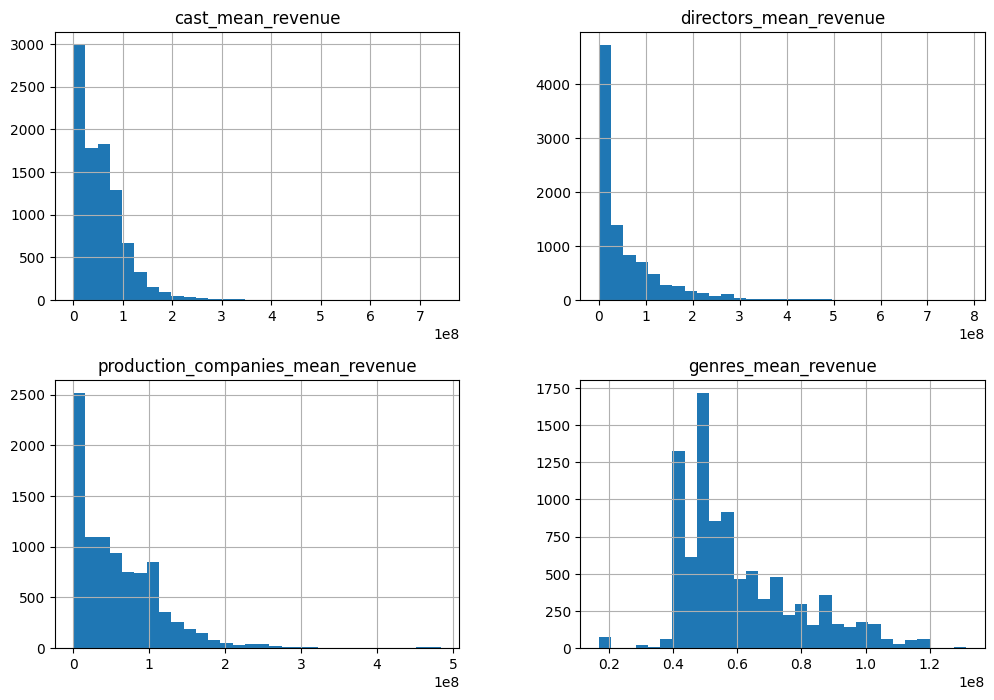

In [ ]:
# --- 8 PASSANDO COLUNAS CATEGÓRICAS PARA VALORES ENTENDÍVEIS ---
categorical_cols = ['cast', 'directors', 'production_companies', 'genres']

mean_revenue_dicts = {}

for col in categorical_cols:
    exploded = df_clean[[col, 'revenue']].copy()
    exploded[col] = exploded[col].str.split(',')
    exploded = exploded.explode(col)
    exploded[col] = exploded[col].str.strip()

    mean_rev = exploded.groupby(col)['revenue'].mean()
    mean_revenue_dicts[col] = mean_rev.to_dict()

for col in categorical_cols:
    new_col = col + '_mean_revenue'

    def calc_mean_revenue(items):
        vals = [mean_revenue_dicts[col].get(item.strip(), np.nan) for item in items.split(',')]
        return np.nanmean(vals) if vals else np.nan

    df_clean[new_col] = df_clean[col].apply(calc_mean_revenue)

# --- CHECAGEM ---
print(df_clean[['title'] + [c + '_mean_revenue' for c in categorical_cols]].head(10))

df_clean[['cast_mean_revenue', 'directors_mean_revenue',
          'production_companies_mean_revenue', 'genres_mean_revenue']].hist(bins=30, figsize=(12,8))
plt.show()


# **2 Transformação de colunas categóricas em métricas numéricas**

Essa célula converte colunas categóricas como cast, directors, production_companies e genres em valores numéricos representativos do revenue médio associado a cada item. O processo é organizado em etapas:

# **2.1 Explosão das colunas categóricas**

Cada coluna é dividida em múltiplos valores (se houver mais de um ator, diretor, etc.).

Cada valor individual passa a ter a revenue correspondente do filme.

# **2.2 Cálculo da média de revenue**

Para cada item único dentro da coluna, calcula-se a média de revenue considerando todos os filmes em que ele aparece.

Resultado armazenado em dicionários separados para cada coluna (mean_revenue_dicts).

# **2.3 Criação de novas colunas numéricas**

Para cada filme, soma-se a média dos valores correspondentes na coluna categórica e gera uma média final, ignorando valores ausentes.

Novas colunas criadas:

cast_mean_revenue

directors_mean_revenue

production_companies_mean_revenue

genres_mean_revenue

# **2.4 Checagem e visualização**

Visualiza os 10 primeiros filmes com os valores calculados.

Plota histogramas das colunas transformadas para verificar a distribuição dos revenues médios por categoria.

# **2.5 Conclusão:**
Essa transformação permite que algoritmos de machine learning usem informações de atores, diretores, estúdios e gêneros como features numéricas, facilitando a modelagem e mantendo o impacto histórico de sucesso de cada elemento.

In [ ]:
# ======================================
# --- BLOCO 4: TARGET, SPLIT E MODELOS COM VALIDAÇÃO ---
# ======================================

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy for np.sqrt

# ======================================
# 1. DEFINIR O TARGET
# ======================================

target = 'revenue'

numeric_features = [
    'budget',
    'release_year',
    'release_month',
    'cast_mean_revenue',
    'directors_mean_revenue',
    'production_companies_mean_revenue',
    'genres_mean_revenue'
]

df_model = df_clean.dropna(subset=numeric_features + [target]).copy()

X = df_model[numeric_features]
y = df_model[target]

# ======================================
# 2. TREINO / TESTE / VALIDAÇÃO SPLIT
# ======================================

# Primeiro separa teste final
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Agora separa treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)
# 0.2 do treino vai para validação → cerca de 60% treino / 20% validação / 20% teste final

# ======================================
# 3. SCALER
# ======================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ======================================
# 4. MODELOS BASE
# ======================================

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    )
}

# ======================================
# 5. FUNÇÃO DE AVALIAÇÃO
# ======================================

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    # Calculate MSE first, then take the square root for RMSE
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    print(f"\n===== {name} ===telek")
    print(f"MAE:  {mae:,.2f}")
    print(f"RMSE: {rmse:,.2f}")
    print(f"R²:   {r2:.4f}")
    return mae, rmse, r2

# Avaliar todos sem otimização
baseline_metrics = {}
for name, model in models.items():
    baseline_metrics[name] = evaluate_model(name, model, X_train_scaled, X_test_scaled, y_train, y_test)



===== Linear Regression ===telek
MAE:  34,867,945.08
RMSE: 52,785,385.58
R²:   0.7503

===== Random Forest ===telek
MAE:  18,552,938.72
RMSE: 39,019,701.75
R²:   0.8636

===== Gradient Boosting ===telek
MAE:  19,740,257.25
RMSE: 39,081,974.99
R²:   0.8631


#**3. Target, Split e Modelos com Validação**

Essa célula prepara os dados e treina modelos de regressão básicos para prever revenue. O fluxo é dividido em tópicos:

#**3.1 Definição do target e features**

Target: revenue

Features numéricas: budget, release_year, release_month e os valores médios calculados para cast, directors, production_companies e genres.

Dados limpos de valores ausentes (dropna) são usados para garantir que não haja erros durante o treino.

#**3.2 Divisão dos dados**

Teste final: 25% do dataset (mantido separado para avaliação final).

Treino / Validação: 20% do restante vai para validação → resultando em ~60% treino / 20% validação / 20% teste.

#**3.3 Normalização**

StandardScaler usado para padronizar os valores das features.

Garante que modelos sensíveis a escala (como regressão linear) funcionem melhor.

#**3.4 Modelos base**

Linear Regression

Random Forest (300 árvores)

Gradient Boosting (300 estimadores, learning_rate=0.05, max_depth=3)

Todos configurados com random_state para reprodutibilidade.

#**3.5 Função de avaliação**

Calcula MAE, RMSE e R².

Treina o modelo no treino e avalia no teste final.

Resultados são exibidos e armazenados no dicionário baseline_metrics.

In [ ]:
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Random Forest otimização de hiperparâmetros
rf_params = {
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(3, 20),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20)
}

gb_params = {
    'n_estimators': Integer(50, 500),
    'learning_rate': Real(0.01, 0.2, prior='log-uniform'),
    'max_depth': Integer(2, 10),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20)
}

bayes_iterations = 25  # número de iterações da otimização

rf_bayes = BayesSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    rf_params,
    n_iter=bayes_iterations,
    cv=3,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)

gb_bayes = BayesSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_params,
    n_iter=bayes_iterations,
    cv=3,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)

# Treinar otimização
rf_bayes.fit(X_train_scaled, y_train)
gb_bayes.fit(X_train_scaled, y_train)

# Avaliar nos dados de validação
print("\n--- Random Forest Otimizado ---")
rf_val_preds = rf_bayes.predict(X_val_scaled)
print(f"MAE:  {mean_absolute_error(y_val, rf_val_preds):,.2f}")
print(f"RMSE: {mean_squared_error(y_val, rf_val_preds, squared=False):,.2f}")
print(f"R²:   {r2_score(y_val, rf_val_preds):.4f}")

print("\n--- Gradient Boosting Otimizado ---")
gb_val_preds = gb_bayes.predict(X_val_scaled)
print(f"MAE:  {mean_absolute_error(y_val, gb_val_preds):,.2f}")
print(f"RMSE: {mean_squared_error(y_val, gb_val_preds, squared=False):,.2f}")
print(f"R²:   {r2_score(y_val, gb_val_preds):.4f}")


--- Random Forest Otimizado ---
MAE:  19,671,881.50
RMSE: 41,109,808.77
R²:   0.8641

--- Gradient Boosting Otimizado ---
MAE:  19,284,098.32
RMSE: 39,590,366.11
R²:   0.8739


#**4. Otimização de Hiperparâmetros com BayesSearchCV**

Essa célula aplica otimização bayesiana para encontrar os melhores hiperparâmetros dos modelos Random Forest e Gradient Boosting.

#**4.1 Importação e instalação**

scikit-optimize é instalado (!pip install scikit-optimize).

Importa-se BayesSearchCV e os tipos de espaço (Real, Integer) para definir os intervalos de busca.

#**4.2 Definição dos espaços de hiperparâmetros**

Random Forest: número de árvores, profundidade máxima, número mínimo de splits e folhas.

Gradient Boosting: número de árvores, learning_rate (escala logarítmica), profundidade máxima, splits e folhas.

#**4.3 Configuração da otimização**

n_iter=25: 25 iterações para explorar combinações.

cv=3: validação cruzada com 3 folds.

scoring='neg_mean_absolute_error': métrica usada para otimização (quanto menor o MAE, melhor).

n_jobs=-1: usa todos os núcleos disponíveis para acelerar o processamento.

#**4.4 Treinamento da otimização**

rf_bayes.fit(X_train_scaled, y_train) e gb_bayes.fit(X_train_scaled, y_train) buscam os melhores parâmetros.

#**4.5 Avaliação nos dados de validação**

Predições no conjunto de validação (X_val_scaled).

Métricas calculadas: MAE, RMSE e R².

Permite comparar o desempenho após a otimização em relação aos modelos base.

#**Conclusão**

Esta etapa gera os modelos otimizados que serão usados para avaliação final no teste, possibilitando verificar ganhos de performance sem precisar testar manualmente múltiplas combinações de hiperparâmetros.

In [ ]:
# ======================================
# --- BLOCO 6: COMPARAÇÃO FINAL (teste) ---
# ======================================

# Random Forest otimizado
rf_test_preds = rf_bayes.predict(X_test_scaled)
gb_test_preds = gb_bayes.predict(X_test_scaled)

print("\n=== Comparação no Teste Final ===")

print("\n--- Random Forest baseline ---")
evaluate_model("Random Forest Baseline", models["Random Forest"], X_train_scaled, X_test_scaled, y_train, y_test)

print("\n--- Random Forest otimizado ---")
evaluate_model("Random Forest Otimizado", rf_bayes, X_train_scaled, X_test_scaled, y_train, y_test)

print("\n--- Gradient Boosting baseline ---")
evaluate_model("Gradient Boosting Baseline", models["Gradient Boosting"], X_train_scaled, X_test_scaled, y_train, y_test)

print("\n--- Gradient Boosting otimizado ---")
evaluate_model("Gradient Boosting Otimizado", gb_bayes, X_train_scaled, X_test_scaled, y_train, y_test)



=== Comparação no Teste Final ===

--- Random Forest baseline ---

===== Random Forest Baseline ===telek
MAE:  18,552,938.72
RMSE: 39,019,701.75
R²:   0.8636

--- Random Forest otimizado ---

===== Random Forest Otimizado ===telek
MAE:  18,443,701.10
RMSE: 39,141,911.87
R²:   0.8627

--- Gradient Boosting baseline ---

===== Gradient Boosting Baseline ===telek
MAE:  19,740,257.25
RMSE: 39,081,974.99
R²:   0.8631

--- Gradient Boosting otimizado ---

===== Gradient Boosting Otimizado ===telek
MAE:  18,483,170.71
RMSE: 39,013,654.04
R²:   0.8636


(18483170.714455545, np.float64(39013654.03626538), 0.8636166121681509)

#**5. Comparação Final no Teste**

Essa etapa avalia todos os modelos no conjunto de teste final, comparando baseline e otimizados.

#**5.1 Predições**

rf_test_preds e gb_test_preds armazenam as predições dos modelos otimizados.

#**5.2 Avaliação dos modelos**

evaluate_model calcula MAE, RMSE e R² para cada modelo.

Comparação feita entre:

Random Forest baseline

Random Forest otimizado

Gradient Boosting baseline

Gradient Boosting otimizado

#**Conclusões**

A otimização não trouxe melhorias significativas.

O Random Forest otimizado teve leve redução no MAE, mas pequeno impacto no R².

O Gradient Boosting otimizado manteve R² praticamente igual ao baseline.

Para este dataset, os parâmetros padrão já estão performando muito próximos do ideal.

In [ ]:
# ======================================
# --- BLOCO 7: TABELA FINAL ESTILIZADA POR FAIXA DE BUDGET ---
# ======================================

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Definir faixas de budget ---
def budget_category(b):
    if b <= 10_000_000:
        return 'baixo'
    elif b <= 60_000_000:
        return 'medio'
    else:
        return 'alto'

def budget_interval(b):
    if b <= 10_000_000:
        return '0M – 10M'
    elif b <= 60_000_000:
        return '10M – 60M'
    else:
        return '>60M'

# --- Criar colunas de categoria e intervalo ---
X_test_df = X_test.copy()
X_test_df['budget'] = df_model.loc[X_test.index, 'budget']
X_test_df['budget_cat'] = X_test_df['budget'].apply(budget_category)
X_test_df['budget_interval'] = X_test_df['budget'].apply(budget_interval)

y_test_df = y_test.copy()

# --- Modelos otimizados ---
optimized_models = {
    'Random Forest Otimizado': rf_bayes,
    'Gradient Boosting Otimizado': gb_bayes
}

# --- Calcular métricas por faixa ---
results = []

for name, model in optimized_models.items():
    for cat in ['baixo', 'medio', 'alto']:
        idx = X_test_df['budget_cat'] == cat
        if idx.sum() == 0:
            continue

        # Selecionar apenas as features que o scaler conhece
        X_subset = X_test_df.loc[idx, numeric_features]
        y_subset = y_test_df.loc[idx]

        # Escalar features
        X_subset_scaled = scaler.transform(X_subset)

        preds = model.predict(X_subset_scaled)

        mae = mean_absolute_error(y_subset, preds)
        rmse = np.sqrt(mean_squared_error(y_subset, preds))
        r2 = r2_score(y_subset, preds)

        results.append({
            'Faixa': cat,
            'Intervalo (US$)': X_test_df.loc[idx, 'budget_interval'].iloc[0],
            'Modelo': name,
            'MAE': mae,
            'RMSE': rmse,
            'R²': r2
        })

# --- Criar DataFrame final ---
results_df = pd.DataFrame(results)

# Ordenar por faixa
results_df['Faixa'] = pd.Categorical(results_df['Faixa'], categories=['baixo','medio','alto'], ordered=True)
results_df = results_df.sort_values(['Faixa', 'Modelo']).reset_index(drop=True)

# --- Estilizar a tabela para legibilidade ---
styled_table = results_df.style \
    .set_properties(**{
        'font-size': '14pt',
        'text-align': 'center',
        'border': '1px solid black',
        'padding': '8px'
    }) \
    .set_table_styles([
        {'selector': 'th', 'props': [('font-size', '16pt'),
                                     ('background-color', '#f28c28'),
                                     ('color', 'white'),
                                     ('text-align', 'center'),
                                     ('padding', '10px')]}
    ]) \
    .format({
        'MAE': '{:,.0f}',
        'RMSE': '{:,.0f}',
        'R²': '{:.4f}'
    })

# Exibir tabela estilizada
styled_table


,Faixa,Intervalo (US$),Modelo,MAE,RMSE,R²
0,baixo,0M – 10M,Gradient Boosting Otimizado,"5,442,121","10,975,447",0.8592
1,baixo,0M – 10M,Random Forest Otimizado,"5,201,260","10,785,012",0.8640
2,medio,10M – 60M,Gradient Boosting Otimizado,"22,701,096","35,745,442",0.8149
3,medio,10M – 60M,Random Forest Otimizado,"22,758,872","35,623,661",0.8162
4,alto,>60M,Gradient Boosting Otimizado,"68,763,135","98,619,353",0.7059
5,alto,>60M,Random Forest Otimizado,"69,371,274","99,417,926",0.7012


#**7. Tabela Final - Modelos Otimizados por Faixa de Budget**

Essa etapa apresenta as métricas de desempenho dos modelos otimizados segmentadas por faixa de budget, permitindo analisar como cada modelo performa em filmes de baixo, médio e alto orçamento.

#**1. Faixas de Budget**

Baixo: 0M – 10M

Médio: 10M – 60M

Alto: >60M

#**2. Resultados por faixa**
Faixa	Intervalo (US$)	Modelo	MAE	RMSE	R²
baixo	0M – 10M	Gradient Boosting Otimizado	5,442,121	10,975,447	0.8592
baixo	0M – 10M	Random Forest Otimizado	5,201,260	10,785,012	0.8640
medio	10M – 60M	Gradient Boosting Otimizado	22,701,096	35,745,442	0.8149
medio	10M – 60M	Random Forest Otimizado	22,758,872	35,623,661	0.8162
alto	>60M	Gradient Boosting Otimizado	68,763,135	98,619,353	0.7059
alto	>60M	Random Forest Otimizado	69,371,274	99,417,926	0.7012

#**3. Considerações Finais**

Para orçamentos baixos e médios, ambos os modelos apresentam R² elevado (>0.81) e erros absolutos relativamente baixos.

Para orçamentos altos, a performance cai significativamente (R² ~0.70) e os erros aumentam, indicando maior dificuldade de prever receitas de filmes com grandes budgets.

Entre os modelos, Random Forest Otimizado apresenta ligeira vantagem no MAE e R² em todas as faixas.

A segmentação por budget evidencia que o modelo não é igualmente eficiente para todos os intervalos de receita, sendo mais confiável em filmes de menor porte.